In [10]:
# !pip install plotly
import pandas as pd
import datetime
from datetime import timedelta
import requests
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
# import chart_studio.tools as tls

I need a 3 indicator signaling trading bot for Binance API, its fairly complicated, and there are challenging parts but I have enough experience building up bots for Binance with freelancers so It should take, with the right expert, around 2-3 weeks for the project

Indicators: RSI , VWAP and EMA in 2 different time frames

# built 60 day historic prices dataframe for a given a list of coins

In [5]:
#clean version of historic prices request
#timestamps are in day-month-year
import requests
import datetime
import pandas as pd
from datetime import timedelta

# dfPrices = pd.DataFrame()
# geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=60&interval=daily'
geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=60&interval=daily'

r = requests.get(geckoReq).json()
ts = r['prices'][0][0]
ts = ts/1000
HistPricesList = []
for i in range(len(r['prices'])):
    currentUnix = r['prices'][i][0] 
    price = r['prices'][i][1]
    currentUnix = currentUnix/1000
    currentTS = datetime.datetime.fromtimestamp(currentUnix).strftime("%d-%m-%Y")
    HistPricesList.append([currentTS])
global dfPrices
dfPrices = pd.DataFrame(HistPricesList, columns = ['dates'])
print(dfPrices)

# display(dfCoin)
# print('dfprices')
# display(dfPrices)

# coin='ethereum'
def historicalCoinPrices(coin):
    global dfPrices
    # geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=60&interval=daily'
    geckoReq = 'https://api.coingecko.com/api/v3/coins/'+coin+'/market_chart?vs_currency=usd&days=60&interval=daily'

    r = requests.get(geckoReq).json()
    ts = r['prices'][0][0]
    # print(ts)
    ts = ts/1000
    print(datetime.datetime.fromtimestamp(ts).strftime("%d-%m-%Y"))
    # print('prices length',len(r['prices']))
    HistPricesList = []
    for i in range(len(r['prices'])):
        currentUnix = r['prices'][i][0] 
        price = r['prices'][i][1]
        currentUnix = currentUnix/1000
        currentTS = datetime.datetime.fromtimestamp(currentUnix).strftime("%d-%m-%Y")
    #     print('price: ', price, 'TS: ', currentTS)
        HistPricesList.append([currentTS, price])
    #     currentUnix = currentTS
#     print(HistPricesList)
    dfCoin = pd.DataFrame(HistPricesList, columns = ['dates', coin])
    # display(dfCoin)
    dfPrices = pd.merge(dfPrices, dfCoin[coin], left_on = dfPrices['dates'], right_on=dfCoin['dates']).drop(['key_0'], axis = 1)
    # display(dfPrices)


theCoins = ['ethereum', 'bitcoin', 'binancecoin', 'solana', 'cardano', 'ripple', 'dogecoin', 'polkadot']


for i in theCoins:
    historicalCoinPrices(i)
    print('just added: ', i)


display(dfPrices)

         dates
0   28-04-2022
1   29-04-2022
2   30-04-2022
3   01-05-2022
4   02-05-2022
..         ...
56  23-06-2022
57  24-06-2022
58  25-06-2022
59  26-06-2022
60  27-06-2022

[61 rows x 1 columns]
28-04-2022
just added:  ethereum
28-04-2022
just added:  bitcoin
28-04-2022
just added:  binancecoin
28-04-2022
just added:  solana
28-04-2022
just added:  cardano
28-04-2022
just added:  ripple
28-04-2022
just added:  dogecoin
28-04-2022
just added:  polkadot


,dates,ethereum,bitcoin,binancecoin,solana,cardano,ripple,dogecoin,polkadot
0,28-04-2022,2932.455084,39741.766646,406.326688,98.004851,0.842937,0.644127,0.137214,16.982954
1,29-04-2022,2817.489882,38650.550138,392.964375,94.094841,0.806222,0.612456,0.135080,16.174241
2,30-04-2022,2738.174136,37820.611765,378.734685,85.302984,0.758064,0.587811,0.127755,14.569888
3,01-05-2022,2832.513107,38537.654767,390.865146,89.738346,0.790253,0.609217,0.133034,15.418774
4,02-05-2022,2861.372376,38561.565399,389.804760,87.604985,0.783051,0.614486,0.131147,14.992753
...,...,...,...,...,...,...,...,...,...
56,23-06-2022,1144.480753,21100.270534,229.084074,38.211823,0.480337,0.335517,0.064144,7.806286
57,24-06-2022,1229.304085,21262.713483,240.946409,42.477220,0.502650,0.368261,0.067254,8.215674
58,25-06-2022,1244.286204,21525.880362,239.917457,42.386373,0.498275,0.367315,0.068569,8.135502
59,26-06-2022,1201.237791,21052.805398,234.532197,39.498442,0.491417,0.360323,0.073763,7.861850


In [11]:
coin = 'ethereum'
geckoReq = 'https://api.coingecko.com/api/v3/coins/'+coin+'/market_chart?vs_currency=usd&days=60&interval=daily'

r = requests.get(geckoReq).json()
display(r)
    #     display(r['total_volumes'])

{'prices': [[1651190400000, 2932.455083612903],
  [1651276800000, 2817.4898821916195],
  [1651363200000, 2738.1741359527714],
  [1651449600000, 2832.513106895354],
  [1651536000000, 2861.3723755560436],
  [1651622400000, 2786.0472478011084],
  [1651708800000, 2942.052313122658],
  [1651795200000, 2753.936566546688],
  [1651881600000, 2699.7072470893745],
  [1651968000000, 2641.229106940243],
  [1652054400000, 2517.8299224886478],
  [1652140800000, 2249.8909622207443],
  [1652227200000, 2344.797715643986],
  [1652313600000, 2080.910243657776],
  [1652400000000, 1966.6991711336661],
  [1652486400000, 2010.214051125259],
  [1652572800000, 2064.229357512243],
  [1652659200000, 2147.047447880575],
  [1652745600000, 2025.8886983912162],
  [1652832000000, 2095.178884796724],
  [1652918400000, 1915.1771232664505],
  [1653004800000, 2023.8482593608173],
  [1653091200000, 1963.9909395294865],
  [1653177600000, 1978.1471325624789],
  [1653264000000, 2046.6463496545232],
  [1653350400000, 1974.581

## working version of daily prices with volume or hourly prices not really working yet

In [1]:
#clean version of historic prices and volume request
#timestamps are in day-month-year
import requests
import datetime
import pandas as pd
from datetime import timedelta



#manipulatable variables
numDaysBack = str(90) #for daily you can go back multiple years worth, for daily you can only go back 90 days
myInterval = 'hourly' # options are daily or hourly
theCoins = ['ethereum', 'bitcoin', 'binancecoin', 'solana', 'cardano', 'ripple', 'dogecoin', 'polkadot']

#builds initial dataframe with ethereum as first market but just to log the dates
geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days='+numDaysBack+'&interval='+myInterval+''
r = requests.get(geckoReq).json()
ts = r['prices'][0][0]
ts = ts/1000
HistPricesList = []
for i in range(len(r['prices'])):
    currentUnix = r['prices'][i][0] 
    price = r['prices'][i][1]
    currentUnix = currentUnix/1000
    currentTS = datetime.datetime.fromtimestamp(currentUnix).strftime("%d-%m-%Y %H:%M:%S")
    HistPricesList.append([currentTS])
global dfPrices
dfPrices = pd.DataFrame(HistPricesList, columns = ['dates'])
print(dfPrices)



#appends the other coins in the coinlist to the dataframe
def historicalCoinData(coin):
    global dfPrices
    # geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=60&interval=daily'
    geckoReq = 'https://api.coingecko.com/api/v3/coins/'+coin+'/market_chart?vs_currency=usd&days='+numDaysBack+'&interval='+myInterval+''

    r = requests.get(geckoReq).json()
    ts = r['prices'][0][0]
    # print(ts)
    ts = ts/1000
    print(datetime.datetime.fromtimestamp(ts).strftime("%d-%m-%Y %H:%M:%S"))
    # print('prices length',len(r['prices']))
    HistPricesList = []
    for i in range(len(r['prices'])):
        currentUnix = r['prices'][i][0] 
        price = r['prices'][i][1]
        volume = r['total_volumes'][i][1]
        currentUnix = currentUnix/1000
        currentTS = datetime.datetime.fromtimestamp(currentUnix).strftime("%d-%m-%Y %H:%M:%S")
    #     print('price: ', price, 'TS: ', currentTS)
        HistPricesList.append([currentTS, price, volume])
    #     currentUnix = currentTS
#         print(HistPricesList)
    dfCoin = pd.DataFrame(HistPricesList, columns = ['dates', coin, coin+'_volume'])
#     print('dfCoin')
#     display(dfCoin)
    dfPrices = pd.merge(dfPrices, dfCoin[coin], left_on = dfPrices['dates'], right_on=dfCoin['dates']).drop(['key_0'], axis = 1)
    dfPrices = pd.merge(dfPrices, dfCoin[coin+'_volume'], left_on = dfPrices['dates'], right_on=dfCoin['dates']).drop(['key_0'], axis = 1)
    # display(dfPrices)


# historicalCoinData('ethereum')
for i in theCoins:
    historicalCoinData(i)
    print('just added: ', i)


display(dfPrices)

                    dates
0     30-03-2022 12:00:45
1     30-03-2022 13:03:31
2     30-03-2022 14:02:21
3     30-03-2022 15:01:55
4     30-03-2022 16:02:29
...                   ...
2151  28-06-2022 08:00:38
2152  28-06-2022 09:01:06
2153  28-06-2022 10:01:08
2154  28-06-2022 11:02:47
2155  28-06-2022 11:14:53

[2156 rows x 1 columns]
30-03-2022 12:00:45
just added:  ethereum
30-03-2022 12:02:13
just added:  bitcoin
30-03-2022 12:00:33
just added:  binancecoin
30-03-2022 12:00:13
just added:  solana
30-03-2022 12:02:03
just added:  cardano
30-03-2022 12:02:12
just added:  ripple
30-03-2022 12:01:17
just added:  dogecoin
30-03-2022 11:02:06
just added:  polkadot


,dates,ethereum,ethereum_volume,bitcoin,bitcoin_volume,binancecoin,binancecoin_volume,solana,solana_volume,cardano,cardano_volume,ripple,ripple_volume,dogecoin,dogecoin_volume,polkadot,polkadot_volume


# attempt at getting hourly prices

In [4]:
#clean version of historic prices and volume request
#timestamps are in day-month-year
import requests
import datetime
import pandas as pd
from datetime import timedelta



#manipulatable variables
numDaysBack = str(365) #for daily you can go back multiple years worth, for daily you can only go back 90 days
myInterval = 'daily' # options are daily or hourly
theCoins = ['ethereum', 'bitcoin', 'binancecoin', 'solana', 'cardano', 'ripple', 'dogecoin', 'polkadot']

#builds initial dataframe with ethereum as first market but just to log the dates
geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days='+numDaysBack+'&interval='+myInterval+''
r = requests.get(geckoReq).json()
ts = r['prices'][0][0]
ts = ts/1000
HistPricesList = []
for i in range(len(r['prices'])):
    currentUnix = r['prices'][i][0] 
    price = r['prices'][i][1]
    currentUnix = currentUnix/1000
    currentTS = datetime.datetime.fromtimestamp(currentUnix).strftime("%d-%m-%Y %H:%M:%S")
    HistPricesList.append([currentTS])
global dfPrices
dfPrices = pd.DataFrame(HistPricesList, columns = ['dates'])
print(dfPrices)



#appends the other coins in the coinlist to the dataframe
def historicalCoinData(coin):
    global dfPrices
    # geckoReq = 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=60&interval=daily'
    geckoReq = 'https://api.coingecko.com/api/v3/coins/'+coin+'/market_chart?vs_currency=usd&days='+numDaysBack+'&interval='+myInterval+''

    r = requests.get(geckoReq).json()
    ts = r['prices'][0][0]
    # print(ts)
    ts = ts/1000
    print(datetime.datetime.fromtimestamp(ts).strftime("%d-%m-%Y %H:%M:%S"))
    # print('prices length',len(r['prices']))
    HistPricesList = []
    for i in range(len(r['prices'])):
        currentUnix = r['prices'][i][0] 
        price = r['prices'][i][1]
        volume = r['total_volumes'][i][1]
        currentUnix = currentUnix/1000
        currentTS = datetime.datetime.fromtimestamp(currentUnix).strftime("%d-%m-%Y %H:%M:%S")
    #     print('price: ', price, 'TS: ', currentTS)
        HistPricesList.append([currentTS, price, volume])
    #     currentUnix = currentTS
#         print(HistPricesList)
    dfCoin = pd.DataFrame(HistPricesList, columns = ['dates', coin, coin+'_volume'])
#     print('dfCoin')
#     display(dfCoin)
    dfPrices = pd.merge(dfPrices, dfCoin[coin], left_on = dfPrices['dates'], right_on=dfCoin['dates']).drop(['key_0'], axis = 1)
    dfPrices = pd.merge(dfPrices, dfCoin[coin+'_volume'], left_on = dfPrices['dates'], right_on=dfCoin['dates']).drop(['key_0'], axis = 1)
    # display(dfPrices)


# historicalCoinData('ethereum')
for i in theCoins:
    historicalCoinData(i)
    print('just added: ', i)


display(dfPrices)

                   dates
0    28-06-2021 18:00:00
1    29-06-2021 18:00:00
2    30-06-2021 18:00:00
3    01-07-2021 18:00:00
4    02-07-2021 18:00:00
..                   ...
361  24-06-2022 18:00:00
362  25-06-2022 18:00:00
363  26-06-2022 18:00:00
364  27-06-2022 18:00:00
365  27-06-2022 23:48:08

[366 rows x 1 columns]
28-06-2021 18:00:00
just added:  ethereum
28-06-2021 18:00:00
just added:  bitcoin
28-06-2021 18:00:00
just added:  binancecoin
28-06-2021 18:00:00
just added:  solana
28-06-2021 18:00:00
just added:  cardano
28-06-2021 18:00:00
just added:  ripple
28-06-2021 18:00:00
just added:  dogecoin
28-06-2021 18:00:00
just added:  polkadot


,dates,ethereum,ethereum_volume,bitcoin,bitcoin_volume,binancecoin,binancecoin_volume,solana,solana_volume,cardano,cardano_volume,ripple,ripple_volume,dogecoin,dogecoin_volume,polkadot,polkadot_volume
0,28-06-2021 18:00:00,2087.518724,3.062933e+10,34556.842127,3.245380e+10,291.029835,1.659012e+09,33.114181,6.745151e+08,1.331854,3.158548e+09,0.648856,2.838367e+09,0.257567,2.479288e+09,15.775888,7.556713e+08
1,29-06-2021 18:00:00,2169.400068,2.714914e+10,35968.993668,3.512126e+10,300.923926,1.889939e+09,33.922933,6.455725e+08,1.371234,3.523964e+09,0.706366,4.215462e+09,0.263482,2.762721e+09,16.279042,9.357368e+08
2,30-06-2021 18:00:00,2279.354161,2.904622e+10,35171.486305,3.102415e+10,303.742443,1.790095e+09,35.834403,7.910913e+08,1.385163,3.404133e+09,0.699653,3.241277e+09,0.253630,2.571422e+09,16.412002,8.587832e+08
3,01-07-2021 18:00:00,2121.657901,2.587425e+10,33677.566236,2.912963e+10,289.192451,1.331379e+09,33.556171,6.634913e+08,1.337625,3.076400e+09,0.663872,2.684815e+09,0.245758,3.268542e+09,15.281224,5.853317e+08
4,02-07-2021 18:00:00,2157.880585,2.286922e+10,33950.786555,2.508405e+10,288.172173,1.025692e+09,33.958908,6.073518e+08,1.395092,3.183425e+09,0.654673,2.075137e+09,0.245550,1.889927e+09,15.342281,4.688164e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,23-06-2022 18:00:00,1144.480753,1.424795e+10,21100.270534,2.365510e+10,229.084074,1.129789e+09,38.211823,1.701452e+09,0.480337,6.968258e+08,0.335517,9.302148e+08,0.064144,3.804089e+08,7.806286,3.660907e+08
361,24-06-2022 18:00:00,1229.304085,1.628849e+10,21262.713483,2.195566e+10,240.946409,1.226204e+09,42.477220,1.721985e+09,0.502650,9.268472e+08,0.368261,2.203591e+09,0.067254,4.572092e+08,8.215674,4.257871e+08
362,25-06-2022 18:00:00,1244.286204,1.169272e+10,21525.880362,1.615244e+10,239.917457,8.552041e+08,42.386373,1.289448e+09,0.498275,6.253185e+08,0.367315,8.395527e+08,0.068569,3.769553e+08,8.135502,3.057753e+08
363,26-06-2022 18:00:00,1201.237791,1.137575e+10,21052.805398,1.539270e+10,234.532197,8.800826e+08,39.498442,1.153550e+09,0.491417,8.103065e+08,0.360323,7.288762e+08,0.073763,8.054996e+08,7.861850,2.525636e+08


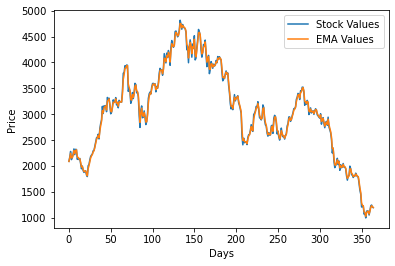

just added:  polkadot
just added:  polkadot
just added:  polkadot
just added:  polkadot
just added:  polkadot
just added:  polkadot
just added:  polkadot
just added:  polkadot
                   dates     ethereum  ethereum_volume       bitcoin  \
0    28-06-2021 18:00:00  2087.518724     3.062933e+10  34556.842127   
1    29-06-2021 18:00:00  2169.400068     2.714914e+10  35968.993668   
2    30-06-2021 18:00:00  2279.354161     2.904622e+10  35171.486305   
3    01-07-2021 18:00:00  2121.657901     2.587425e+10  33677.566236   
4    02-07-2021 18:00:00  2157.880585     2.286922e+10  33950.786555   
..                   ...          ...              ...           ...   
360  23-06-2022 18:00:00  1144.480753     1.424795e+10  21100.270534   
361  24-06-2022 18:00:00  1229.304085     1.628849e+10  21262.713483   
362  25-06-2022 18:00:00  1244.286204     1.169272e+10  21525.880362   
363  26-06-2022 18:00:00  1201.237791     1.137575e+10  21052.805398   
364  27-06-2022 18:00:00  1194.2

In [14]:

# plt.plot(dfPrices['ethereum'], label="Stock Values")
# plt.plot(dfPrices['ethereum_ewm'], label="EMA Values")
# plt.xlabel("Days")
# plt.ylabel("Price")
# plt.legend()
# plt.show()

for coin in theCoins:
    dfPrices[coin+'_ewm'] = dfPrices[coin].ewm(com=0.4).mean()
    print('just added: ', i)
    
print(dfPrices)